In [2]:
from getpass import getpass
import os
user = getpass('User')
password = getpass('Password')
os.environ['GIT_AUTH'] = user + ':' + password
!git clone https://$GIT_AUTH@github.com/Ace95/DeepLearning_Project.git

User··········
Password··········
Cloning into 'DeepLearning_Project'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 203072 (delta 217), reused 267 (delta 130), pack-reused 202712
Receiving objects: 100% (203072/203072), 1.44 GiB | 5.90 MiB/s, done.
Resolving deltas: 100% (322/322), done.
Checking out files: 100% (30049/30049), done.


In [3]:
import os
import cv2    
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from keras.models import Model 
from keras.layers import Dropout, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

plt.style.use('ggplot')

%matplotlib inline

Using TensorFlow backend.


In [0]:
#MobileNet accepts 224*224px images as inputs
img_size = 224 

IMG_W = img_size 
IMG_H = img_size
IMG_SHAPE = (IMG_H, IMG_W,3)
TARGET_SIZE = (IMG_H, IMG_W)

# Model Architecture

In [0]:
def mobilenet_model():
  base = MobileNetV2(input_shape=IMG_SHAPE,
                     weights=None,
                     include_top=False,
                     pooling='avg') #Top layers are not included to apply Transfer Learning
  
  #New model top
  x = base.output
  x = Dense(1536, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.3)(x)
  top = Dense(3, activation='sigmoid')(x)
  
  return Model(inputs=base.input, outputs=top)

In [16]:
model = mobilenet_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [7]:
batch_size = 80
num_epochs = 12
trainDIR='../orient/train'
valDIR='../orient/valid'
%cd /content/DeepLearning_Project/MobileNet_FaceClustering/

/content/DeepLearning_Project/MobileNet_FaceClustering


In [23]:
#Training 
train_datagen = ImageDataGenerator(rotation_range=20, 
                                   rescale=1./255, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(trainDIR,
                                                    target_size=TARGET_SIZE,
                                                    color_mode='rgb',
                                                    batch_size = batch_size,
                                                    shuffle= True)

valid_generator = valid_datagen.flow_from_directory(valDIR,
                                                    target_size=TARGET_SIZE,
                                                    color_mode='rgb',
                                                    batch_size = batch_size,
                                                    shuffle= True)


Found 8383 images belonging to 3 classes.
Found 1801 images belonging to 3 classes.


In [0]:
model.compile(loss='cosine_proximity',
              optimizer='adadelta',
              metrics=['binary_accuracy'])


In [25]:
history = model.fit_generator(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    max_queue_size=1,
    shuffle=True,
    verbose=1
)

Epoch 1/12
105/105 [==============================] - 206s 2s/step - loss: -0.6099 - binary_accuracy: 0.5814 - val_loss: -0.6265 - val_binary_accuracy: 0.5171
Epoch 2/12
105/105 [==============================] - 179s 2s/step - loss: -0.6475 - binary_accuracy: 0.6623 - val_loss: -0.6391 - val_binary_accuracy: 0.3333
Epoch 3/12
105/105 [==============================] - 179s 2s/step - loss: -0.6490 - binary_accuracy: 0.6324 - val_loss: -0.6169 - val_binary_accuracy: 0.5171
Epoch 4/12
105/105 [==============================] - 179s 2s/step - loss: -0.6762 - binary_accuracy: 0.6219 - val_loss: -0.5755 - val_binary_accuracy: 0.3333
Epoch 5/12
105/105 [==============================] - 180s 2s/step - loss: -0.7138 - binary_accuracy: 0.6712 - val_loss: -0.5674 - val_binary_accuracy: 0.3333
Epoch 6/12
105/105 [==============================] - 180s 2s/step - loss: -0.7373 - binary_accuracy: 0.7061 - val_loss: -0.5581 - val_binary_accuracy: 0.3333
Epoch 7/12
105/105 [==========================

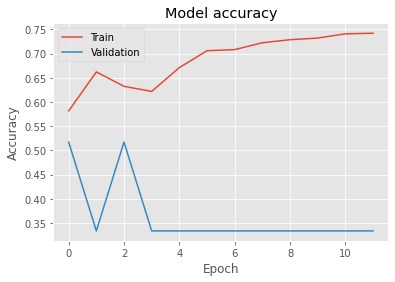

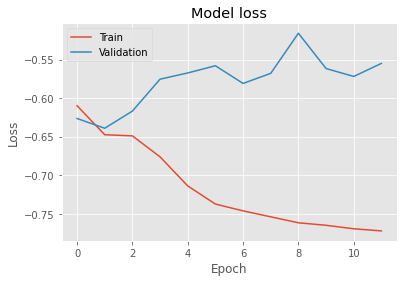

In [26]:
def plot_model_history(history):
  '''plots useful graphs about the model training: loss, accuracy, ecc.'''
  plt.plot(history.history['binary_accuracy'])
  plt.plot(history.history['val_binary_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  
# plot the training and validation loss for every epoch:
plot_model_history(history)